In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [0]:
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/sf_04_21.csv")
dbutils.fs.mv("file:/tmp/sf_04_21.csv", "dbfs:/lingyiwu2/spark_hw1/data/sf_04_21.csv")
display(dbutils.fs.ls("dbfs:/lingyiwu2/spark_hw1/data/"))

path name size modificationTime dbfs:/lingyiwu2/spark_hw1/data/sf_04_21.csv sf_04_21.csv 550945238 1713743388000

In [0]:
data_path = "dbfs:/lingyiwu2/spark_hw1/data/sf_04_21.csv"

In [0]:
crime_data_lines = sc.textFile("dbfs:/lingyiwu2/spark_hw1/data/sf_04_21.csv")
print(crime_data_lines.first())
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])
header = df_crimes.first()
print(header)

crimes = df_crimes.filter(lambda x: x != header)
print(crimes.count())

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06  2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'location', 'SF Find Neighborhoods 2 2', 'Current Police Di

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

PdId IncidntNum Incident Code Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y location SF Find Neighborhoods 2 2 Current Police Districts 2 2 Current Supervisor Districts 2 2 Analysis Neighborhoods 2 2 DELETE - Fire Prevention Districts 2 2 DELETE - Police Districts 2 2 DELETE - Supervisor Districts 2 2 DELETE - Zip Codes 2 2 DELETE - Neighborhoods 2 2 DELETE - 2017 Fix It Zones 2 2 Civic Center Harm Reduction Project Boundary 2 2 Fix It Zones as of 2017-11-06 2 2 DELETE - HSOC Zones 2 2 Fix It Zones as of 2018-02-07 2 2 CBD, BID and GBD Boundaries as of 2017 2 2 Areas of Vulnerability, 2016 2 2 Central Market/Tenderloin Boundary 2 2 Central Market/Tenderloin Boundary Polygon - Updated 2 2 HSOC Zones as of 2018-06-05 2 2 OWED Public Spaces 2 2 Neighborhoods 2 4133422003074 041334220 03074 ROBBERY ROBBERY, BODILY FORCE Monday 11/22/2004 17:50 INGLESIDE NONE GENEVA AV / SANTOS ST -122.420084075249 37.7083109744362 POINT (-122.420084075249 37.7083109744362) null null 9 null null null 8 309 null null null null null null null null null null null null null 5118535807021 051185358 07021 VEHICLE THEFT STOLEN AUTOMOBILE Tuesday 10/18/2005 20:00 PARK NONE TURK ST / STJOSEPHS AV -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 4018830907021 040188309 07021 VEHICLE THEFT STOLEN AUTOMOBILE Sunday 02/15/2004 02:00 SOUTHERN NONE BRANNAN ST / 1ST ST -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 11014543126030 110145431 26030 ARSON ARSON Friday 02/18/2011 05:27 INGLESIDE NONE 0 Block of SANJUAN AV -122.43622001281 37.7243766140428 POINT (-122.43622001281001 37.7243766140428) 94 9 1 28 9 7 6 28861 25 null null null null null null 1 null null null null 94 10108108004134 101081080 04134 ASSAULT BATTERY Sunday 11/21/2010 17:00 SOUTHERN NONE 400 Block of 10TH ST -122.410541166987 37.7709130566165 POINT (-122.410541166987 37.7709130566165) 32 1 10 34 8 2 9 28853 34 null null null null null null 2 null null null null 32 13027069804134 130270698 04134 ASSAULT BATTERY Tuesday 04/02/2013 15:50 TARAVAL NONE 14TH AV / SANTIAGO ST -122.470365997562 37.74515794927 POINT (-122.470365997562 37.74515794927) 44 10 8 41 1 8 4 29491 40 null null null null null null 1 null null null null 44 17063991304134 170639913 04134 ASSAULT BATTERY Sunday 08/06/2017 18:15 SOUTHERN NONE 800 Block of BRYANT ST -122.40340479147905 37.775420706711 POINT (-122.40340479147905 37.775420706711) 32 1 10 34 14 2 9 28853 34 null null null null null null 2 null null null null 32 16020415607020 160204156 07020 VEHICLE THEFT STOLEN AND RECOVERED VEHICLE Thursday 03/03/2016 19:30 TARAVAL NONE 100 Block of BEPLER ST -122.46354501681947 37.70796836450968 POINT (-122.46354501681947 37.70796836450968) null null null null null null null 28588 null null null null null null null null null null null null null 6068579904134 060685799 04134 ASSAULT BATTERY Saturday 06/17/2006 03:00 TARAVAL NONE 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) null null null null null null null 28588 null null null null null null null null null null null null null 5134166327195 051341663 27195 TRESPASS TRESPASSING Monday 11/28/2005 16:04 TENDERLOIN ARREST, BOOKED ELLIS ST / 5THSTNORTH ST -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 9098843805041 090988438 05041 BURGLARY BURGLARY OF RESIDENCE, FORCIBLE ENTRY Thursday 09/24/2009 13:30 BAYVIEW NONE 1500 Block of SHAFTER AV -122.389849114797 37.7304741509374 POINT (-122.38984911479702 37.7304741509374) 86 2 9 1 10 3 8 58 1 null null null null null null 2 null null null null 86 12620267506244 126202675 06244 LARCENY/THEFT GRAND THEFT FROM LOCKED AUTO Friday 12/21/2012 19:15 CENTRAL NONE PACIFIC AV / GRA

In [0]:
#Q1 question (OLAP) counts the number of crimes for different category.

In [0]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

In [0]:
crimeCategory = spark.sql('SELECT category,COUNT(*) AS count FROM sf_crime GROUP BY category ORDER BY Count DESC')
display(crimeCategory)

category count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

In [0]:
crimes_pd_df = crimeCategory.toPandas()
display(crimes_pd_df)

category count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

<Figure size 432x288 with 0 Axes>

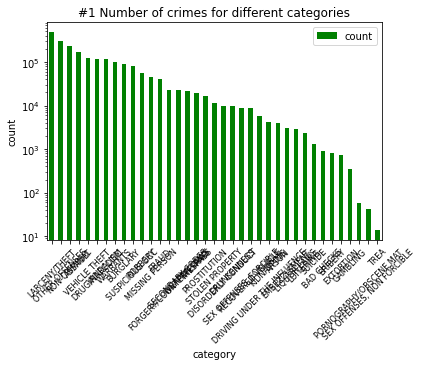

In [0]:
plt.figure()
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
ax = crimes_pd_df.plot(kind = 'bar',x = 'category',y = 'count',logy= True,color = 'green',legend = True, align = 'center')
ax.set_ylabel('count',fontsize = 10)
ax.set_xlabel('category',fontsize = 10)
plt.xticks(fontsize = 8, rotation=45)
plt.title('#1 Number of crimes for different categories')
display()

In [0]:
#Q2:the number of crimes for different distinct

In [0]:
crimeDistrict = spark.sql("SELECT  PdDistrict AS district, COUNT(*) AS count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
display(crimeDistrict)

district count SOUTHERN 390692 MISSION 288985 NORTHERN 266435 CENTRAL 221923 BAYVIEW 205480 TENDERLOIN 186954 INGLESIDE 181092 TARAVAL 155461 PARK 119698 RICHMOND 112804 NA 1

<Figure size 432x288 with 0 Axes>

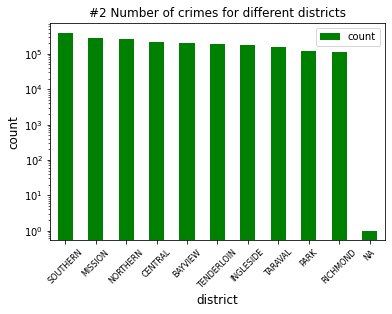

In [0]:
crimes_dis_pd_df = crimeDistrict.toPandas()
plt.figure()
ax = crimes_dis_pd_df.plot(kind = 'bar',x='district',y = 'count',logy= True,color = 'green',legend = True, align = 'center')
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('district',fontsize = 12)
plt.xticks(fontsize=8, rotation=45)
plt.title('#2 Number of crimes for different districts')
display()

In [0]:
#Q3:Count the number of crimes each "Sunday" at "SF downtown".

In [0]:
crimePosition = spark.sql("SELECT CAST(X AS float), CAST(Y AS float) FROM sf_crime WHERE X is not NULL and Y is not NULL and Y!=90 ORDER BY 2 DESC")
display(crimePosition)
crimePosition_info = spark.sql("SELECT avg(X) AS CenterX, max(X)-min(X) as RangeX, avg(Y) as CenterY, max(Y)-min(Y) as RangeY FROM sf_crime WHERE Y!=90")
display(crimePosition_info)

X Y -122.36475 37.82062 -122.36475 37.82062 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.374275 37.819977 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.3744 37.819923 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37245 37.817314 -122.37182 37.816772 -122.37182 37.816772 -122.37182 37.816772 -122.37182 37.816772 -122.37182 37.816772 -122.37182 37.816772 -122.37182 37.816772 -122.37131 37.815342 -122.37131 37.815342 -122.37131 37.815342 -122.37131 37.81

CenterX RangeX CenterY RangeY -122.4229116193873 -0.14889135989699298 37.767892671193394 0.1127418156566975

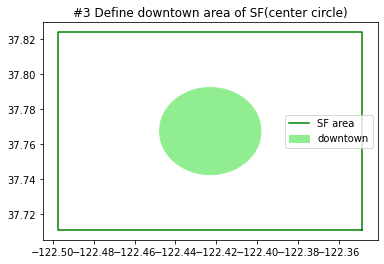

In [0]:
from matplotlib.patches import Rectangle
x = -122.42300858032046
y = 37.76739009566873
sizex = -0.14889135989699298
sizey = 0.1127418156566975
rectx = [x-sizex/2,x+sizex/2,x+sizex/2,x-sizex/2,x-sizex/2]
recty = [y-sizey/2,y-sizey/2,y+sizey/2,y+sizey/2,y-sizey/2]
plt.plot(rectx,recty,color = 'green')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
dtsize = sizex/6  
dtrectx = list(np.linspace(x-dtsize,x+dtsize,120))
dtrecty = [((dtsize)**2-(_-x)**2)**0.5+y for _ in dtrectx]+[-((dtsize)**2-(_-x)**2)**0.5+y for _ in dtrectx]
plt.fill(dtrectx+dtrectx,dtrecty,color= 'lightgreen')
plt.legend(('SF area','downtown'))
plt.title('#3 Define downtown area of SF(center circle)')
display()

In [0]:
crimedt = spark.sql("SELECT DayOfWeek,COUNT(*) AS crime_cnt FROM sf_crime WHERE (X+122.42300858032046)*(X+122.42300858032046)+(Y-37.76739009566873)*(Y-37.76739009566873)<(0.14889135989699298/8)*(0.14889135989699298/8) GROUP BY 1")
display(crimedt) 

crimedt_sunday = spark.sql("SELECT CAST(X AS float), CAST(Y AS float),DayOfWeek FROM sf_crime WHERE (X+122.42300858032046)*(X+122.42300858032046)+(Y-37.76739009566873)*(Y-37.76739009566873)<(0.14889135989699298/8)*(0.14889135989699298/8) AND DayOfWeek='Sunday'")

allcrime = spark.sql("SELECT DayOfWeek,COUNT(*) AS crime_cnt FROM sf_crime GROUP BY 1")
display(allcrime) 

DayOfWeek crime_cnt Wednesday 86851 Tuesday 83732 Friday 86935 Thursday 83832 Saturday 82839 Monday 80200 Sunday 77308

DayOfWeek crime_cnt Wednesday 311601 Tuesday 302455 Friday 324151 Thursday 303893 Saturday 308907 Monday 294530 Sunday 283988

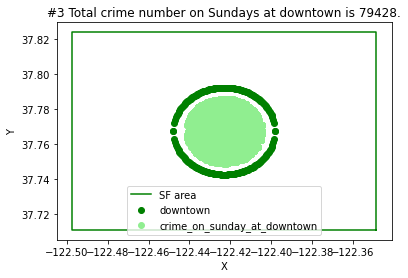

In [0]:
crimes_dt_sunday_pd_df = crimedt_sunday.toPandas()
fig, ax = plt.subplots()
ax.plot(rectx,recty,color = 'green')
ax.scatter(dtrectx+dtrectx,dtrecty,color= 'green')
crimes_dt_sunday_pd_df.plot(kind = 'scatter',x ='X',y='Y',s=35,color = 'lightgreen',ax=ax)
plt.legend(('SF area','downtown','crime_on_sunday_at_downtown'))
plt.title('#3 Total crime number on Sundays at downtown is 79428.')
display()

In [0]:
#Q4 Analyze the number of crime in each month of 2015, 2016, 2017, 2018.

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
def custom_split(x, delimiter):
    return x.split(delimiter)
spark.udf.register("custom_split", custom_split, StringType())

Out[103]: <function __main__.custom_split(x, delimiter)>

In [0]:
def date_to_month(x):
  m_y = [x.split('/')[0],'/',x.split('/')[2]]
  return ''.join(m_y)
def date_to_year(x):
  y = [x.split('/')[2]] 
  return int(''.join(y))
dtm_udf = udf(lambda x: date_to_month(x))
dty_udf = udf(lambda x: date_to_year(x))

In [0]:
df_opt2 = df_opt1.withColumn('Month',dtm_udf('Date'))  
df_opt3 = df_opt2.withColumn('Year',dty_udf('Date'))  
df_month_res = df_opt3.filter(df_opt3.Year>2014).groupBy('Month').count().orderBy('Count')
display(df_month_res)

Month count 05/2018 3519 02/2018 9565 04/2018 9954 03/2018 10354 12/2015 11106 01/2018 11667 11/2015 11691 06/2016 11727 02/2016 11743 02/2017 11780 07/2016 11832 02/2015 11882 04/2016 11905 11/2017 11940 03/2016 11950 09/2016 12092 08/2016 12104 12/2017 12115 06/2017 12186 09/2017 12204 11/2016 12254 05/2016 12313 08/2017 12428 04/2017 12452 09/2015 12476 04/2015 12526 01/2016 12532 12/2016 12629 01/2017 12687 10/2015 12697 07/2017 12717 05/2017 12758 06/2015 12853 10/2016 12913 07/2015 12949 10/2017 12970 01/2015 13181 03/2017 13250 08/2015 13317 05/2015 13318 03/2015 13463

<Figure size 432x288 with 0 Axes>

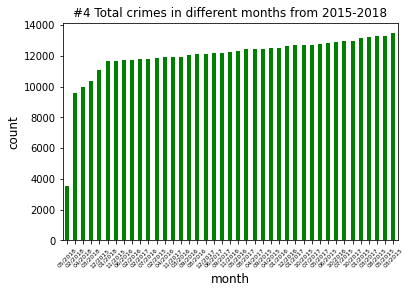

In [0]:
df_month_res_pd_df = df_month_res.toPandas()
plt.figure()
ax = df_month_res_pd_df.plot(kind ='bar',x='Month',y='count',color = 'green',legend = False)
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('month',fontsize = 12)
plt.xticks(fontsize=6, rotation=45)
plt.title('#4 Total crimes in different months from 2015-2018')
display()

In [0]:
#Q5 Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15.

In [0]:
def time_to_hour(x):
  return x.split(':')[0]
tth_udf = udf(lambda x: time_to_hour(x))
df_opt4 = df_opt1.withColumn('Hour',tth_udf('Time')) # add a new column with hour extracted from time
df_hour_res = df_opt4.filter(df_opt4.Date =='12/15/2017').groupBy('Hour').count().orderBy('count')
display(df_hour_res)

Hour count 05 2 03 4 02 6 06 6 04 9 13 10 07 11 14 11 01 12 09 14 20 17 21 20 12 23 15 26 11 26 08 26 17 27 10 27 18 28 23 28 19 29 16 30 00 30 22 36

<Figure size 432x288 with 0 Axes>

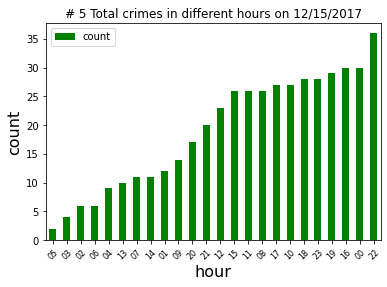

In [0]:
df_hour_res_pd_df = df_hour_res.toPandas()
plt.figure()
ax = df_hour_res_pd_df.plot(kind ='bar',x='Hour',y='count',color = 'green',legend = True)
ax.set_ylabel('count',fontsize = 16)
ax.set_xlabel('hour',fontsize = 16)
plt.xticks(fontsize=8, rotation=45)
plt.title('# 5 Total crimes in different hours on 12/15/2017')
display()

In [0]:
#Q6:(1) Step1: Find out the top-3 danger disrict
#(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1
#(3) give your advice to distribute the police based on your analysis results.

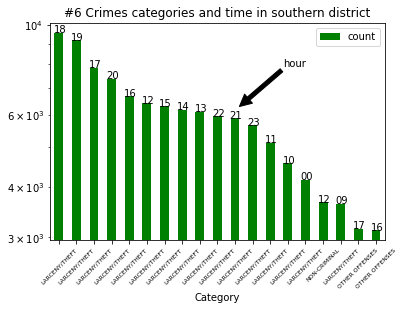

In [0]:
q6 = df_opt4.filter(df_opt4.PdDistrict =='SOUTHERN').groupBy('Category','Hour').count().orderBy('count',ascending=False)
q6 = q6.filter(q6['count']>3000)  
q6_pd_df = q6.toPandas()

hours =[row['Hour'] for row in q6.select('Hour').collect()] 
ax = q6_pd_df.plot(kind='bar',x='Category',y='count',logy= True,color = 'green',legend = True)
x_offset = -0.3
y_offset = 0.5
for k,p in enumerate(ax.patches):
    b = p.get_bbox()
    val = hours[k]    
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
ax.annotate('hour', xy=(10.25,6297), xytext=(12.75,7897),arrowprops=dict(facecolor='black', shrink=3))
plt.title('#6 Crimes categories and time in southern district')
plt.xticks(fontsize=6, rotation=45)

display()

In [0]:
#Q7 For different category of crime, find the percentage of resolution

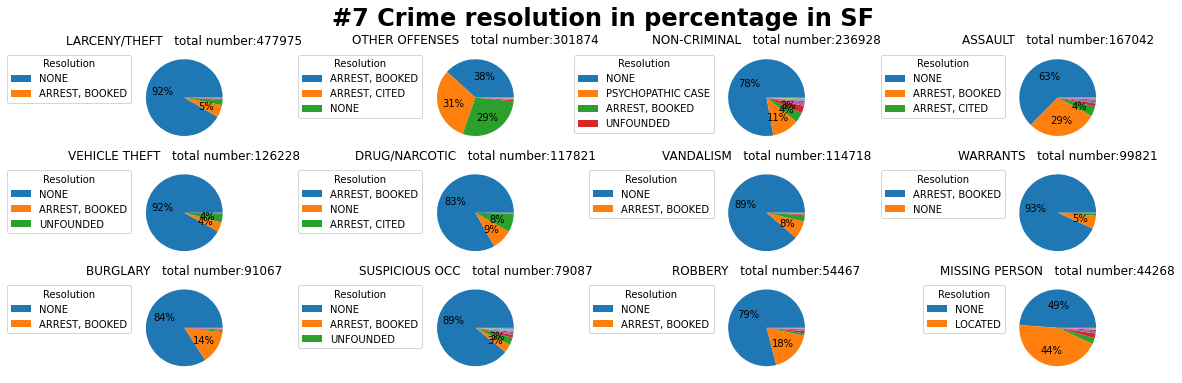

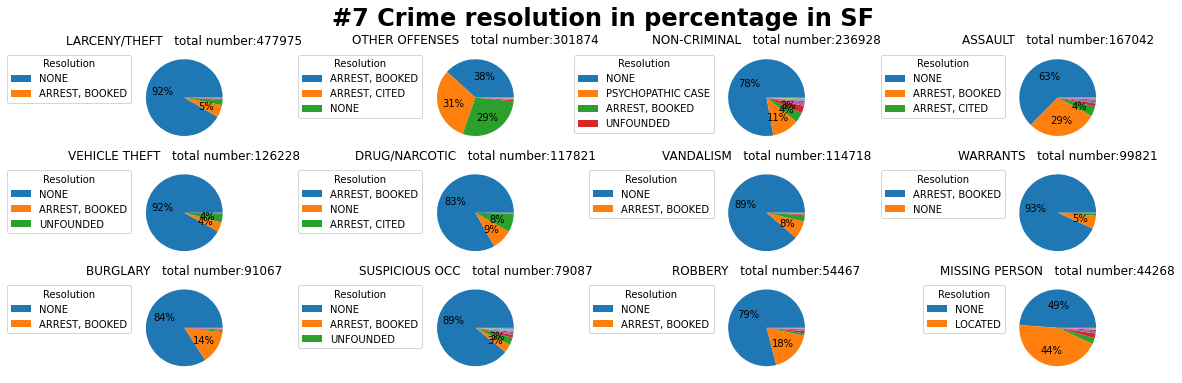

In [0]:
category =[row['category'] for row in q1_result.select('category').collect()] 
category_cnt =[row['count'] for row in q1_result.select('count').collect()] 
q7 = spark.sql("SELECT  category, Resolution FROM sf_crime GROUP")

thres = 3 # did not show resolution below 3%
def autopct_more_than_thres(pct):
    return ('%1.f%%' % pct) if pct >thres else ''
m,n = 3,4 
df = {} 
fig, ax = plt.subplots(m,n,figsize=(20, 6))
plt.suptitle('#7 Crime resolution in percentage in SF',fontsize = 24,fontweight='bold')
for i,j in enumerate(category[0:m*n]): 
  x= df_opt1.filter(q7.category == j).groupBy('Resolution').count().orderBy('count',ascending = False)
  x = x.withColumn('percentage',x['count']/category_cnt[i])
  df[category[i]]=x
  cat_res = x.toPandas()
  temp_ax = ax[i//n,i%n]
  temp_ax.set_title(category[i]+'   total number:'+str(category_cnt[i]))
  xlabels = x.filter(x.percentage>(thres*0.01)).select('Resolution').orderBy('percentage',ascending = False)
  labels = xlabels.toPandas()
  wedges,texts,autotexts = temp_ax.pie(cat_res['count'],autopct=autopct_more_than_thres)
  temp_ax.legend(wedges,labels['Resolution'],title="Resolution",loc="upper right",bbox_to_anchor=(0, 1))
display(fig)